# Fraud Detection Model

In [97]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
df=pd.read_csv('Fraud.csv')

### Dataset Overview

In [3]:
# shape of dataset
df.shape

(6362620, 11)

1. The dataset contains 6362620 rows, indicating the total number of records.
2. The dataset conatins 11 columns, representing the features.

In [4]:
#First 5 records
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#Last 5 records
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
#Summary Statistics
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)


In [9]:
round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest',]].describe().T,
      2)

,count,mean,std,min,25%,50%,75%,max
step,6362620.0000,243.4000,142.3300,1.0000,156.0000,239.0000,335.0000,743.0000
amount,6362620.0000,179861.9000,603858.2300,0.0000,13389.5700,74871.9400,208721.4800,92445516.6400
oldbalanceOrg,6362620.0000,833883.1000,2888242.6700,0.0000,0.0000,14208.0000,107315.1800,59585040.3700
newbalanceOrig,6362620.0000,855113.6700,2924048.5000,0.0000,0.0000,0.0000,144258.4100,49585040.3700
oldbalanceDest,6362620.0000,1100701.6700,3399180.1100,0.0000,0.0000,132705.6600,943036.7100,356015889.3500
newbalanceDest,6362620.0000,1224996.4000,3674128.9400,0.0000,0.0000,214661.4400,1111909.2500,356179278.9200


In [10]:
df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest','isFraud',
       'isFlaggedFraud']].corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.0000,0.0224,-0.0101,-0.0103,0.0277,0.0259,0.0316,0.0033
amount,0.0224,1.0000,-0.0028,-0.0079,0.2941,0.4593,0.0767,0.0123
oldbalanceOrg,-0.0101,-0.0028,1.0000,0.9988,0.0662,0.0420,0.0102,0.0038
newbalanceOrig,-0.0103,-0.0079,0.9988,1.0000,0.0678,0.0418,-0.0081,0.0038
oldbalanceDest,0.0277,0.2941,0.0662,0.0678,1.0000,0.9766,-0.0059,-0.0005
newbalanceDest,0.0259,0.4593,0.0420,0.0418,0.9766,1.0000,0.0005,-0.0005
isFraud,0.0316,0.0767,0.0102,-0.0081,-0.0059,0.0005,1.0000,0.0441
isFlaggedFraud,0.0033,0.0123,0.0038,0.0038,-0.0005,-0.0005,0.0441,1.0000



there is MULTI_COLLINEARITY between independent features

( 'oldbalanceDest', 'newbalanceDest' ) = 0.9766
( 'oldbalanceOrg', 'newbalanceOrg') = 0.9988
Need to remove one from each of two correlation

In [11]:
df[df['amount']==0]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0000,C1510987794,0.0000,0.0000,C1696624817,0.0000,0.0000,1,0
3247298,250,CASH_OUT,0.0000,C521393327,0.0000,0.0000,C480398193,0.0000,0.0000,1,0
3760289,279,CASH_OUT,0.0000,C539112012,0.0000,0.0000,C1106468520,538547.6300,538547.6300,1,0
5563714,387,CASH_OUT,0.0000,C1294472700,0.0000,0.0000,C1325541393,7970766.5700,7970766.5700,1,0
5996408,425,CASH_OUT,0.0000,C832555372,0.0000,0.0000,C1462759334,76759.9000,76759.9000,1,0
5996410,425,CASH_OUT,0.0000,C69493310,0.0000,0.0000,C719711728,2921531.3400,2921531.3400,1,0
6168500,554,CASH_OUT,0.0000,C10965156,0.0000,0.0000,C1493336195,230289.6600,230289.6600,1,0
6205440,586,CASH_OUT,0.0000,C1303719003,0.0000,0.0000,C900608348,1328472.8600,1328472.8600,1,0
6266414,617,CASH_OUT,0.0000,C1971175979,0.0000,0.0000,C1352345416,0.0000,0.0000,1,0
6281483,646,CASH_OUT,0.0000,C2060908932,0.0000,0.0000,C1587892888,0.0000,0.0000,1,0



all transactions which contain 'amount'=0 , are fraud transactions.
Its obvious that if someone having NIL amount in their account, then their is no sense to transfer money.
Thus most probabily , fraudulent agents are targeting random accounts , and may be they don't aware about account balance.

In [12]:
df[df['isFlaggedFraud']==1]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.0800,C728984460,4953893.0800,4953893.0800,C639921569,0.0000,0.0000,1,1
3247297,250,TRANSFER,1343002.0800,C1100582606,1343002.0800,1343002.0800,C1147517658,0.0000,0.0000,1,1
3760288,279,TRANSFER,536624.4100,C1035541766,536624.4100,536624.4100,C1100697970,0.0000,0.0000,1,1
5563713,387,TRANSFER,4892193.0900,C908544136,4892193.0900,4892193.0900,C891140444,0.0000,0.0000,1,1
5996407,425,TRANSFER,10000000.0000,C689608084,19585040.3700,19585040.3700,C1392803603,0.0000,0.0000,1,1
5996409,425,TRANSFER,9585040.3700,C452586515,19585040.3700,19585040.3700,C1109166882,0.0000,0.0000,1,1
6168499,554,TRANSFER,3576297.1000,C193696150,3576297.1000,3576297.1000,C484597480,0.0000,0.0000,1,1
6205439,586,TRANSFER,353874.2200,C1684585475,353874.2200,353874.2200,C1770418982,0.0000,0.0000,1,1
6266413,617,TRANSFER,2542664.2700,C786455622,2542664.2700,2542664.2700,C661958277,0.0000,0.0000,1,1
6281482,646,TRANSFER,10000000.0000,C19004745,10399045.0800,10399045.0800,C1806199534,0.0000,0.0000,1,1


All transactions which are Flag fraud are actually fraud transactions.



In [13]:
df[(df['amount']==df['oldbalanceOrg']) & (df['isFraud']==1)]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0
6362618,743,TRANSFER,850002.5200,C1685995037,850002.5200,0.0000,C2080388513,0.0000,0.0000,1,0


if 'amount'=='oldbalanceOrg', then its Fraud Transactions.
It means , whenever fraudulent agents are aware about target account balance.
then their motive was to transfer all account balanced to their respected destination accounts.

### Data Preprocessing

In [14]:
#Check for missing values in the dataset

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no null values in the dataset

In [15]:
df[df.duplicated()]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [16]:
df.duplicated().sum()


np.int64(0)

In [17]:
df['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

### Exploratory Data Analysis

In [18]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

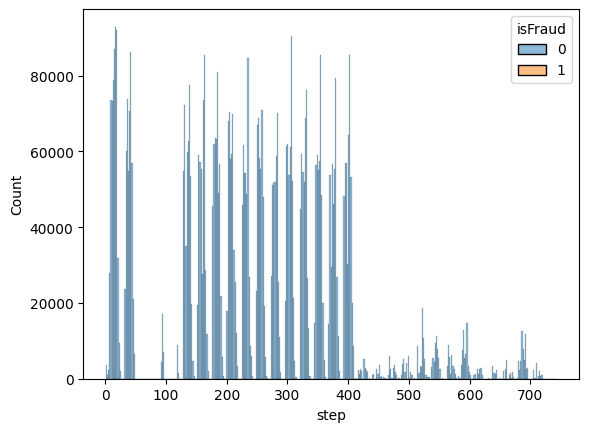

In [19]:
sns.histplot(x='step', data=df,hue='isFraud');



It is difficult to identify fraud transcation time duration,
but we noticed that most of the transactions are below 400 time unit
where 1 time unit = 1 hr

<Axes: xlabel='amount'>

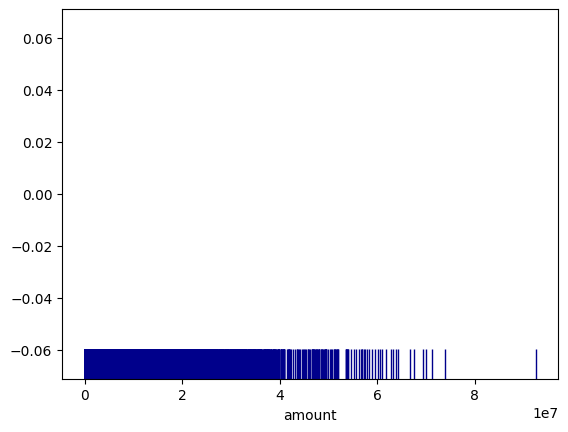

In [20]:
sns.rugplot(x='amount', data=df, height=.08, color='darkblue')


Most of the transaction amounts are small amount and
very few transactions are having large amount transfer.
Thus, their is higher probability that these transactions may be done by fraudulent agents.

In [21]:
df['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

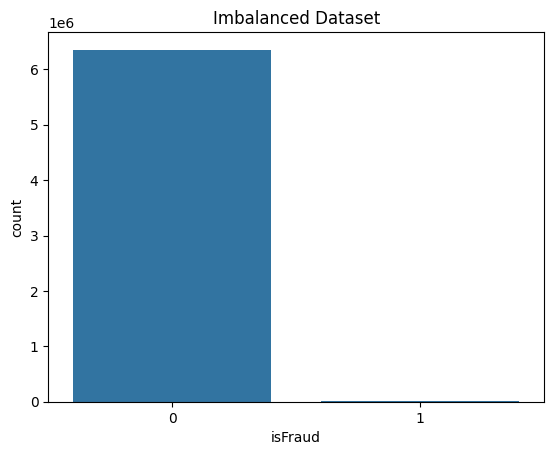

In [22]:
sns.countplot(x=df['isFraud'])
plt.title("Imbalanced Dataset")
plt.show()

This histograph clearly shows that our dataset is highly Un_Balanced.
Because even in real life , the ratio between fraud transc. and normal trans are one side weighted.
Need to handle this , otherwise it will impact our model Training.

In [23]:
df['type'].value_counts()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

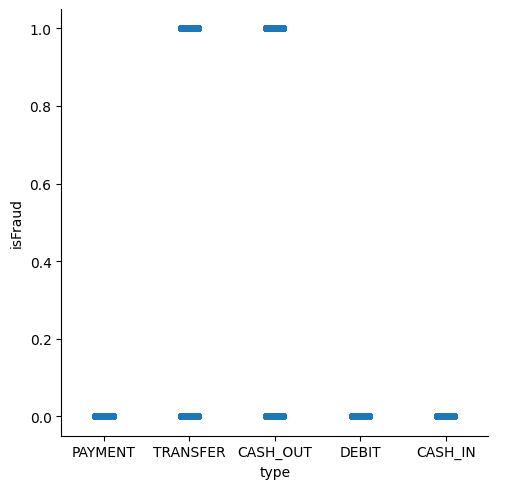

In [24]:
sns.catplot(data=df, x="type", y="isFraud")


Most of the Fraud transactions are performed on "TRANSFER" and "CASH_OUT" type.

In [25]:
df.loc[(df['type']=="CASH_OUT") & (df['isFraud']==1)]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
681,1,CASH_OUT,20128.0000,C1118430673,20128.0000,0.0000,C339924917,6268.0000,12145.8500,1,0
724,1,CASH_OUT,416001.3300,C749981943,0.0000,0.0000,C667346055,102.0000,9291619.6200,1,0
970,1,CASH_OUT,1277212.7700,C467632528,1277212.7700,0.0000,C716083600,0.0000,2444985.1900,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.9900,C994950684,63416.9900,0.0000,C1662241365,276433.1800,339850.1700,1,0
6362613,743,CASH_OUT,1258818.8200,C1436118706,1258818.8200,0.0000,C1240760502,503464.5000,1762283.3300,1,0
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0


In [26]:
df.loc[(df['type']=="TRANSFER") & (df['isFraud']==1)]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
969,1,TRANSFER,1277212.7700,C1334405552,1277212.7700,0.0000,C431687661,0.0000,0.0000,1,0
1115,1,TRANSFER,35063.6300,C1364127192,35063.6300,0.0000,C1136419747,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.9900,C778071008,63416.9900,0.0000,C1812552860,0.0000,0.0000,1,0
6362612,743,TRANSFER,1258818.8200,C1531301470,1258818.8200,0.0000,C1470998563,0.0000,0.0000,1,0
6362614,743,TRANSFER,339682.1300,C2013999242,339682.1300,0.0000,C1850423904,0.0000,0.0000,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0


It is clear that fraudent agents only targeted "CASH_OUT" and "TRANSFER" type of trans. becuase 100% fraud transactions are lie inside these two types.

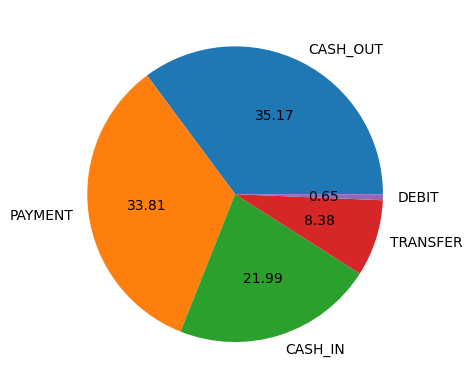

In [27]:
# Calculating individal % of each category of 'type' column in our transactions
#   using pie chart

plt.pie(x = df['type'].value_counts(),
       autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

Approx. 69% transactions are of type "CASH_OUT" and "PAYMENT",
due to which fraudulent agents targeted these two type.

### Outliers

In [28]:

# using iqr method in "step" feature...

per25=df['step'].quantile(0.25)
per75=df['step'].quantile(0.75)
iqr=per75-per25
up_limit=per75+(1.5*iqr)
low_limit=per25-(1.5*iqr)
print("upper limit :- ",up_limit)
print("upper limit :- ",low_limit)

upper limit :-  603.5
upper limit :-  -112.5


In [29]:
df[df["step"]>603]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6259932,604,TRANSFER,714218.4800,C454938739,714218.4800,0.0000,C482986731,0.0000,0.0000,1,0
6259933,604,CASH_OUT,714218.4800,C1835708623,714218.4800,0.0000,C1881116283,106940.8300,821159.3100,1,0
6259934,604,TRANSFER,277582.5300,C2144116571,277582.5300,0.0000,C570246252,0.0000,0.0000,1,0
6259935,604,CASH_OUT,277582.5300,C1512896686,277582.5300,0.0000,C731882373,0.0000,277582.5300,1,0
6259936,604,TRANSFER,4672401.0400,C801580496,4672401.0400,0.0000,C1917884973,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0
6362618,743,TRANSFER,850002.5200,C1685995037,850002.5200,0.0000,C2080388513,0.0000,0.0000,1,0


There are more than 100 thousand records considered as outlier in "step" feature .
we can't remove these records , because of value.

and ,
other independent features (numeric ) are denotes amount ( money transaction ),
thus removing these column is not good option.
becuase higher amount may have higher probability to denote fraud transaction.

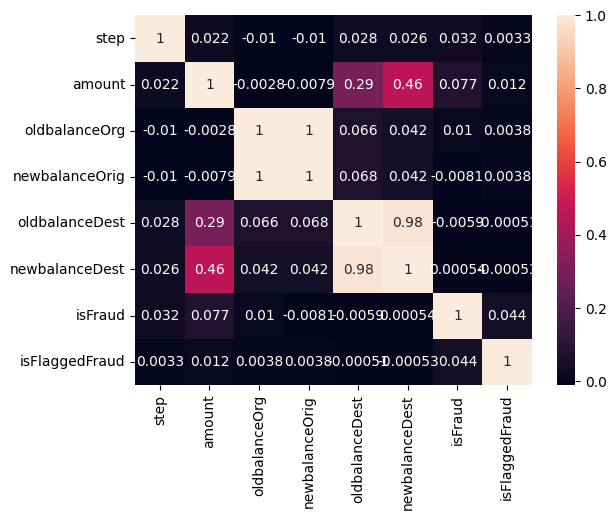

In [30]:
sns.heatmap(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest', 'isFraud','isFlaggedFraud']].corr(),
            annot=True
           )
plt.show()

Their is multi_collinearity between 4 independent features
( 'oldbalanceDest', 'newbalanceDest' ) = 0.9766
( 'oldbalanceOrg', 'newbalanceOrig') = 0.9988
Need to remove one from each of two correlation

Best option is to remove 'newbalanceOrig' and 'newbalanceDest',
becuase they are less correlated with dependent feature ( "isFraud"),
as compare to other two one.

In [32]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation and get the correlation with 'isFraud'
correlation_with_isFraud = numeric_df.corr()['isFraud']
print(correlation_with_isFraud)



step              0.0316
amount            0.0767
oldbalanceOrg     0.0102
newbalanceOrig   -0.0081
oldbalanceDest   -0.0059
newbalanceDest    0.0005
isFraud           1.0000
isFlaggedFraud    0.0441
Name: isFraud, dtype: float64


### Feature Selection

In [35]:
def correlation(dataset, threshold):
    """ 
    Returns a set of unimportant (highly correlated) numeric features
    """
    # Store unimportant column names
    column_corr = set()
    
    # Select only numeric columns
    numeric_data = dataset.select_dtypes(include=['number'])
    
    # Store correlation matrix of numeric data
    corr_matrix = numeric_data.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Compare correlation values with threshold
            if corr_matrix.iloc[i, j] > threshold:
                # If true, fetch the column name
                colname = corr_matrix.columns[i]
                
                # Add column name to the set
                column_corr.add(colname)
    
    return column_corr


In [36]:
# calling ... with threshold value 0.9
correlated_features=correlation(df,0.9)

In [37]:
# total number of un_important features
len(set(correlated_features))

2

In [38]:
# name of these columns ( independent features)
correlated_features


{'newbalanceDest', 'newbalanceOrig'}

In [39]:
# Removing these features from DataFrame.

df=df.drop(correlated_features,axis=1)

In [40]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,C1231006815,170136.0000,M1979787155,0.0000,0,0
1,1,PAYMENT,1864.2800,C1666544295,21249.0000,M2044282225,0.0000,0,0
2,1,TRANSFER,181.0000,C1305486145,181.0000,C553264065,0.0000,1,0
3,1,CASH_OUT,181.0000,C840083671,181.0000,C38997010,21182.0000,1,0
4,1,PAYMENT,11668.1400,C2048537720,41554.0000,M1230701703,0.0000,0,0


### Checking variations of data in features
if variation is zero (0) , means that column ( feature ) is not
having any correlation with dependent features. and we need to remove that column.

In [41]:
from sklearn.feature_selection import VarianceThreshold


In [42]:
"""
threshold=0  means feature having only 1 value ( no variation)
threshold=1 means feature having 2 different values ( small variation)
etc
"""
Var_Thresh=VarianceThreshold(threshold=0)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True,  True])

True :- having variations<br>
False :- not having variations

In [43]:
# when threshold=1

Var_Thresh=VarianceThreshold(threshold=1)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True, False])

'isFlaggedFraud' feature having Low_variation in data ,
but we can't remove that column, because it contain these two values (0,1)
which helps to identify whether our transc. is fraud or not
and ,

it also shows good correlationship with dependent feature ( target feature )
Thus removing this feature is not good option.

Checking whether categorical features are useful or not


In [44]:
df.dtypes


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
nameDest           object
oldbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

we have 3 categorical features "type" , "nameOrig" , "nameDest"



In [45]:
print(" type having these unique values :- \n",df["type"].unique())
print("\n\n nameOrig having these unique values :- \n",df["nameOrig"].unique())
print("\n\n nameDest having these unique values :- \n",df["nameDest"].unique())


 type having these unique values :- 
 ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


 nameOrig having these unique values :- 
 ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


 nameDest having these unique values :- 
 ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


we have 4 unique values in "type" feature,

and "nameOrig" and "nameDest" contain more unique values
Lets check their count

In [46]:
df['nameOrig'].value_counts()


nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
              ..
C1970706589    1
C40604503      1
C1614818636    1
C2089752665    1
C154988899     1
Name: count, Length: 6353307, dtype: int64

In [47]:
df['nameDest'].value_counts()


nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
C1049862186      1
C2118381511      1
C2099952089      1
C1027984317      1
C1251365829      1
Name: count, Length: 2722362, dtype: int64

most of the data inside "nameOrig" and "nameDest"
are unique ( approx 90% and 60% ), means it will be not useful for model training .
Thus, good option is to remove them.
and even their are just Account names.

In [48]:
df=df.drop({'nameOrig','nameDest'},axis=1)


In [49]:
df.head()


,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,170136.0000,0.0000,0,0
1,1,PAYMENT,1864.2800,21249.0000,0.0000,0,0
2,1,TRANSFER,181.0000,181.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,181.0000,21182.0000,1,0
4,1,PAYMENT,11668.1400,41554.0000,0.0000,0,0


### Feature Encoding
There is only one categorical feature which is "type"

In [50]:
df["type"].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [51]:
df["type"].value_counts()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


We will replace large count class with bigger numeric number,
so, it will helps model for batter understanding of data pattern while training

In [52]:
df['type']=df['type'].map({'CASH_OUT':5, 'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})


In [53]:
df.head()


,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,0.0000,0,0
2,1,2,181.0000,181.0000,0.0000,1,0
3,1,5,181.0000,181.0000,21182.0000,1,0
4,1,4,11668.1400,41554.0000,0.0000,0,0


In [54]:
df["type"].unique()


array([4, 2, 5, 1, 3])

In [55]:
df["type"].value_counts()


type
5    2237500
4    2151495
3    1399284
2     532909
1      41432
Name: count, dtype: int64

#### Handling imbalanced Data


In [56]:
df["isFraud"].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [57]:
"""
Creating 2 new DataFrame ,
one contain fraud transaction
and another one contain genuine transaction
"""
normal_transaction=df[df['isFraud']==0]
fraud_transaction=df[df['isFraud']==1]

In [58]:
normal_transaction.head()


,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,0.0000,0,0
4,1,4,11668.1400,41554.0000,0.0000,0,0
5,1,4,7817.7100,53860.0000,0.0000,0,0
6,1,4,7107.7700,183195.0000,0.0000,0,0


In [59]:
fraud_transaction.head()


,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
2,1,2,181.0000,181.0000,0.0000,1,0
3,1,5,181.0000,181.0000,21182.0000,1,0
251,1,2,2806.0000,2806.0000,0.0000,1,0
252,1,5,2806.0000,2806.0000,26202.0000,1,0
680,1,2,20128.0000,20128.0000,0.0000,1,0


In [60]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(6354407, 7)
(8213, 7)


In [61]:
# taking random 8213 records from normal_transaction

normal_transaction=normal_transaction.sample(n=8213)

In [62]:
"""
Now, we have 50-50% fraud and normal transaction data.
next step is to concatenating them
"""
print(normal_transaction.shape)
print(fraud_transaction.shape)

(8213, 7)
(8213, 7)


In [63]:
normal_transaction['amount'].describe()


count       8213.0000
mean      180383.8990
std       675538.0661
min            5.3500
25%        12963.2200
50%        72487.0600
75%       208619.2600
max     34768753.6500
Name: amount, dtype: float64

In [64]:
fraud_transaction['amount'].describe()


count       8213.0000
mean     1467967.2991
std      2404252.9472
min            0.0000
25%       127091.3300
50%       441423.4400
75%      1517771.4800
max     10000000.0000
Name: amount, dtype: float64

mean of fraud transaction is higher then normal transaction



In [66]:
# Concatenating these two dataset , to remove un-balanced dataset problem

# axis=0 means adding at rows
df1=pd.concat([normal_transaction,fraud_transaction], axis=0)

In [67]:
df1.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
3450502,257,3,179464.6700,2547490.1100,640480.2800,0,0
977782,44,4,7564.6900,42472.0000,0.0000,0,0
5637370,396,5,141769.6100,9926.0000,2527298.5200,0,0
6171636,563,2,125970.6800,401389.0000,1093705.5600,0,0
5372117,376,5,141807.4100,305612.0000,745448.3300,0,0


In [68]:
df1.tail()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
6362615,743,5,339682.1300,339682.1300,0.0000,1,0
6362616,743,2,6311409.2800,6311409.2800,0.0000,1,0
6362617,743,5,6311409.2800,6311409.2800,68488.8400,1,0
6362618,743,2,850002.5200,850002.5200,0.0000,1,0
6362619,743,5,850002.5200,850002.5200,6510099.1100,1,0


Fraud_transcation" dataset added at the end of "normal_transcation" dataset

In [69]:
df1.shape

(16426, 7)

### Splitting Data

In [70]:
# independent features
X=df1.drop("isFraud",axis=1)

# dependent feature
y=df1["isFraud"]


In [71]:
X.shape


(16426, 6)

In [72]:
y.shape


(16426,)

In [73]:
from sklearn.model_selection import train_test_split


In [74]:
x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.2, stratify=y , random_state=0)


In [75]:
print("x-train :- ", x_train.shape)
print("x-test :-  ",  x_test.shape)
print("y-train :- ", y_train.shape)
print("y-test :-  ",  y_test.shape)

x-train :-  (13140, 6)
x-test :-   (3286, 6)
y-train :-  (13140,)
y-test :-   (3286,)


In [76]:
y_test.value_counts()


isFraud
0    1643
1    1643
Name: count, dtype: int64

In [77]:
y_train.value_counts()


isFraud
1    6570
0    6570
Name: count, dtype: int64

### Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler


In [80]:
scaler=StandardScaler()


In [81]:
scaler.fit(x_train)


StandardScaler()

In [82]:
x_train_scaler=scaler.transform(x_train)


In [83]:
x_test_scaler=scaler.transform(x_test)


In [84]:
x_train_scaler


array([[-0.58199403, -1.33719044, -0.37876971, -0.34727918, -0.22661978,
        -0.0302337 ],
       [-0.29300155, -1.33719044, -0.29493348, -0.29816824, -0.22661978,
        -0.0302337 ],
       [ 1.95701134,  0.99056612,  4.86865483,  2.72664173, -0.21128963,
        -0.0302337 ],
       ...,
       [-0.28268039, -1.33719044, -0.39856602, -0.28931087, -0.22661978,
        -0.0302337 ],
       [ 0.39335559,  0.99056612,  0.33875762,  0.07304554, -0.22661978,
        -0.0302337 ],
       [ 0.84232605,  0.99056612,  1.90555443,  0.99086903, -0.17522928,
        -0.0302337 ]])

In [85]:
x_test_scaler


array([[-0.86582594,  0.99056612, -0.42988897, -0.37799129, -0.09363922,
        -0.0302337 ],
       [-0.86582594,  0.99056612, -0.33703975, -0.38249736,  1.80764918,
        -0.0302337 ],
       [-0.52522765,  0.21464726, -0.43480518, -0.38246036, -0.22661978,
        -0.0302337 ],
       ...,
       [ 0.01147267,  0.21464726, -0.41511303, -0.38249736, -0.22661978,
        -0.0302337 ],
       [-1.38704452,  0.21464726, -0.43221755, -0.38249736, -0.22661978,
        -0.0302337 ],
       [-1.30447524,  0.99056612, -0.3862713 , -0.35167358, -0.2187648 ,
        -0.0302337 ]])

### Training and Evaluating model


#### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train_scaler,y_train)




LogisticRegression()

In [87]:
from sklearn.metrics import accuracy_score

y_pred=log_model.predict(x_test_scaler)
print(accuracy_score(y_test.values,y_pred)*100)




77.41935483870968


####  Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
rand_model=RandomForestClassifier()
rand_model.fit(x_train_scaler,y_train)



RandomForestClassifier()

In [90]:
y_pred=rand_model.predict(x_test_scaler)

print(accuracy_score(y_test.values,y_pred)*100)


98.38709677419355


### Support Vector Machine


In [91]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train_scaler,y_train)




SVC()

In [92]:
y_pred=svm_model.predict(x_test_scaler)
print(accuracy_score(y_test.values,y_pred)*100)



89.22702373706635


#### GaussianNB

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
gnb_model.fit(x_train_scaler,y_train)



GaussianNB()

In [94]:
y_pred=gnb_model.predict(x_test_scaler)
print(accuracy_score(y_test.values,y_pred)*100)


55.99513085818625


#### Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaler, y_train)




DecisionTreeClassifier()

In [96]:
y_pred = dt_model.predict(x_test_scaler)
print(accuracy_score(y_test.values, y_pred) * 100)


97.83931832014608


## Conclusion
Random Forest performing well with high accuracy

## Question

1. Data cleaning including missing values, outliers and multi-collinearity
- The dataset has no missing values
- Outliers in the step feature were identified but retained as they provide meaningful transaction patterns.
- Multi-collinearity: Highly correlated features such as newbalanceOrig and newbalanceDest were removed to simplify the model and avoid redundancy. Correlation analysis confirmed the choices.
- 


2. Describe your fraud detection model in elaboration
- Several classifiers were tested for fraud detection, but Random Forest outperformed them.
- The dataset was balanced using random sampling, and the model was trained on scaled features to optimize predictions. 
- Random Forest was selected for its robustness and high interpretability in identifying key predictors.


3. How did you select variables to be included in the model?
- Variables were selected based on correlation analysis, domain knowledge, and data patterns observed during EDA
- Features with high collinearity were removed.
- Categorical variables like type were encoded into meaningful numerical values.
- isFlaggedFraud was retained for its direct relevance to fraud detection, despite low variance.

4. Demonstrate the performance of the model by using best set of tools. 
- Performance was evaluated using accuracy

- The Random Forest model achieved the highest accuracy among tested models.


5. What are the key factors that predict fraudulent customer? 
- Transaction Type: "TRANSFER" and "CASH_OUT" transactions are more likely to be fraudulent.
- Transaction Amount: High-value transactions are disproportionately associated with fraud.
- Account Balances: Patterns where the amount equals oldbalanceOrg often indicate fraud.


6. Do these factors make sense? If yes, How? If not, How not? <br>
Yes, these factors align with real-world fraud patterns:

- Fraudulent agents target significant amounts (amount) to maximize gains.
- Specific transaction types (TRANSFER, CASH_OUT) are easier to manipulate or disguise.
- Fraudulent transactions often deplete account balances completely, explaining the correlation with oldbalanceOrg.

7. What kind of prevention should be adopted while company update its infrastructure?
- Enhanced Authentication: Implement multi-factor authentication (MFA) to ensure legitimate access.
- Real-Time Fraud Detection: Use AI-powered models to flag suspicious transactions dynamically.
- Behavioral Analysis: Establish baseline transaction patterns for customers to identify anomalies.
- Data Encryption: Protect sensitive data to prevent unauthorized access.

8. Assuming these actions have been implemented, how would you determine if they work?
- Reduction in Fraudulent Transactions: Monitor the frequency and value of fraud over time.
- Customer Feedback: Assess customer trust and satisfaction through surveys or reduced complaints.
- Key Metrics: Track false positive rates and model precision/recall to ensure minimal disruption to legitimate transactions.
- Audits: Regularly audit the system's performance and address emerging vulnerabilities.